# Numerisk løsning av ordinære differensialligninger

**Anne Kværnø**

$\newcommand{mb}[1]{\mathbf{#1}}$

# Problemstilling

I dette notatet ser vi på noen numeriske teknikker for å løse [førsteordens ordinære differensialligninger (ODL)](https://wiki.math.ntnu.no/tma4100/tema/differentialequations?&#numeriske_losninger), på formen 

$$ \mb{y}'(x) = \mb{f}(x, \mb{y}(x)),  \qquad \mb{y}(a) = \mb{y}_0 $$

der $ \mb{y}'(x) = \frac{d\mb{y}(x)}{dx}. $ I praksis ser vi bare på løsningen over et visst interval $[a,b]$.

##### Eksempel på en skalar ODL: 

$$ y'(x) = -2xy(x) $$

Denne har løsningene 

$$ y(x) = C e^{-x^2}, $$

der C er en vilkårlig integrasjonskonstant. For å finne en entydig løsning, må vi også oppgi en startverdibetingelse, for eksempel y(0) = 1, hvilket i dette eksempelet vil gi den entydige løsningen 
$y(x) = e^{-x^2}$. 

##### Eksempel på et system av ODL
[Lotka-Volterra ligningen](https://en.wikipedia.org/wiki/Lotka–Volterra_equations) beskriver vekselspillet mellom rovdyr og byttedyr. 
Ligningen er gitt ved

\begin{align}
y'(x) &= \alpha y(x) - \beta y(x) z(x) \\
z'(x) &= \delta y(x)z(x) - \gamma z(x) 
\end{align}

og parameterne $\alpha, \beta, \delta$ og $\gamma$ avhenger av hvilke populasjoner som modelleres med disse ligningene. 

##### Eksempel på høyere ordens ligninger
[Van der Pols ligning](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)
er en ikke-lineær 2. ordens differensialligning gitt ved

$$ u'' = \mu (1-u^2)u' - u, \qquad u(0)=u_0, u'(0)=u'_0. $$

Denne kan skrives om til et system av første ordens ligninger. 


I dette notatet skal vi se på noen ulike teknikker for numerisk tilnærmelse til løsningen av ordinære differensialligninger.  Vi utvikler metodene basert på en skalar ligning, men de er akkurat like brukbare for systemer av ligninger. 

# Eulers metode

For å demonstrere ideen med numerisk løsning av ODL, la oss se på det aller enkleste eksempelet, [Eulers metode](https://wiki.math.ntnu.no/tma4100/tema/differentialequations?&#numeriske_losninger). Vi kommer til å diskutere metoden for skalare ligninger, men den kan akkurat like gjerne brukes for systemer. 

Vi skal altså finne en tilnærmet løsning til ligningen

$$ y'(x) = f(x,y(x)), \qquad y(a)=y_0, \qquad a \leq x \leq b. $$

_Ide:_ Del intervallet $[a,b]$ i $N$ like delintervaller, hver av lengde $h=(b-a)/N$, og la $x_n = a+nh$, $n=0,1,\dotsc,N$.  For hver $x_n$ vil vi gjerne finne en tilnærmelse $y_n \approx y(x_n)$. 

[Taylor-utviklingen](https://wiki.math.ntnu.no/tma4100/tema/taylorpolynomials) av den eksakte løsningen $y(x_0+h)$ rundt $x_0$ gir: 

$$ y(x_0+h) = y(x_0) + h y'(x_0) + \frac{1}{2}h^2 y''(x_0) + \dotsm. $$

Anta nå at _steglengden_ $h$ er så liten at løsningen domineres av de første to leddene, og bruk det som numerisk tilnærmelse: 

$$ y(x_0+h) \approx y(x_0) + h y'(x_0) = y_0 + hf(x_0, y_0) = y_1.$$

Denne prosessen kan gjentas fra punktet $(x_1,y_1)$, osv, slik at Eulers metode blir: 

$$ y_{n+1} = y_{n} + h f(x_n, y_n), \qquad n=0,1,\qquad N-1. $$

## Implementasjon
Implementasjonen under er konstruert som en testplattform. Det skal være enkelt å prøve ut andre metoder enn Eulers metode. Den er derfor delt inn i to funksjoner: 
* `euler`: Denne gjør et steg med Eulers metode: 

   \begin{align}
   y_{n+1} & = y_n + hf(x_n, y_n) \\
   x_{n+1} & = x_n + h
   \end{align}
   
* `ode_loser`: Dette er en generisk løser, den kan brukes for andre metoder enn Euler. 
* Andre metoder må alltid være være implementert slik at kallet av dem er

   `x_neste, y_neste = metode(f, x, y, h)`. 

In [1]:
# Importer nødvendige moduler, og sett parametre for plotting. 
# Dette må alltid kjøres først!
%matplotlib inline
from numpy import *               # Matematiske funksjoner og lin.alg.
from numpy.linalg import norm
from matplotlib.pyplot import *   # Grafikk
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
rcParams.update(newparams)

In [2]:
def euler(f, x, y, h):
    # Et steg med Eulers metode
    y_neste = y + h*f(x, y)
    x_neste = x + h
    return x_neste, y_neste

def odl_loser(f, a, b, y0, h, metode=euler):
    # Løser for ordinære differensialligninger
    #    y' = f(x,y), y(a)=y0
    # Inn: f, a, b, og startverdien y0
    #      steglengde h
    #      metode: funksjon som gjør et steg med en gitt metode
    # Ut: Array med x- og y- verdier. 
    
    # Initialisering 
    
    y_num = array([y0])   # Array for løsningen y 
    x_num = array([a])    # Array for x-verdiene 

    xn = a                # Løpende verdier av x og y
    yn = y0 
    while xn < b - 1.e-10:               # Buffer for avrundingsfeil        
        xn, yn = metode(f, xn, yn, h)    # Et steg framover
        
        # Utvider arrayene for y_sol og x_sol med oppdatert løsning 
        y_num = concatenate((y_num, array([yn])))
        x_num = append(x_num,xn)
        
    return x_num, y_num

## Testing

Test algoritmen på ligningen 

$$ y'(x) = -2xy(x), \qquad y(0)=1, \qquad 0 \leq x \leq 1,  $$

med eksakt løsning $y(x)=e^{-x^2}$. Prøv med skrittlenger $h=0.1$, $h=0.05$ og $h=0.01$. Sammenlign med den eksakte løsningen. 

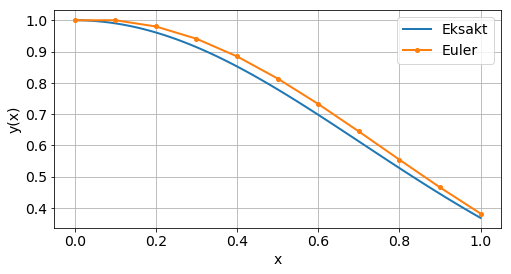

In [3]:
# Definerer høyresiden i differensialligningen
def f(x, y):
    return -2*x*y

# Den eksakte løsningen
def y_eksakt(x):
    return exp(-x**2)

a, b = 0, 1                   # Integrasjonsintervall
y0 = 1                        # Startverdier
h = 0.1                       # Steglengde

x_num, y_num = odl_loser(f, a, b, y0, h)

# Plott den eksakte løsningen
x = linspace(a, b, 101)
plot(x, y_eksakt(x))

# Plott den numeriske løsningen
plot(x_num, y_num, '.-')

xlabel('x')
ylabel('y(x)')
legend(['Eksakt', 'Euler']);


Vi kan også lage et plott av feilen $y(x_n)-y_n$:

Maks feil =  0.0348030569286


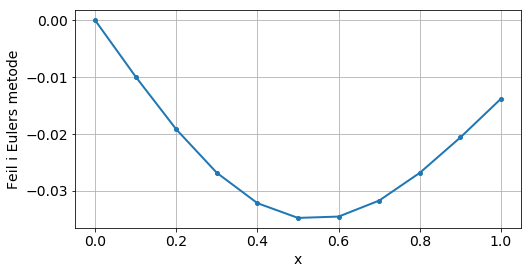

In [4]:
feil = y_eksakt(x_num)-y_num
plot(x_num, feil, '.-')
xlabel('x')
ylabel('Feil i Eulers metode');
print('Maks feil = ', max(abs(feil)))  # Skriv ut maksfeilen

#### Numerisk eksperiment
1. Gjenta forsøket med den logistiske ligningen

   $$ y' = y(1-y), \qquad y(0) = y_0, $$
   
   på intervallet $[0, 10]$. Bruk startverdien $y_0=0.1$, men prøv gjerne med andre startverdier også. 
   
   Eksakt løsning er 
   
   $$ y(x) = \frac{1}{1-(1-\frac{1}{y0})e^{-x}} $$
   
   

## Systemer av ODL
Så langt har vi kun diskutert en skalar differensialligning. Eulers metode, så vel som de andre metodene vi skal presentere, fungerer like godt for systemer av $m$ ligninger: 

\begin{align}
  y_1' &= f_1(x, y_1, \dotsc, y_m), & y_1(a) &= y_{1,0} \\
  y_2' &= f_2(x, y_1, \dotsc, y_m), & y_2(a) &= y_{2,0} \\
       & \vdots \\
  y_m' &= f_m(x, y_1, \dotsc, y_m), & y_m(a) &= y_{m,0}
\end{align}

eller mer kompakt: 

$$ \mb{y}'(x) = \mb{f}(x, \mb{y}(x)),  \qquad \mb{y}(a) = \mb{y}_0. $$

Eulers metode blir som før 

$$ \mb{y}_{n+1} = \mb{y}_n + h \mb{f}(x_n, \mb{y}_n), \qquad n=0,\dotsc,N-1, $$

den eneste forskjellen er at $y_{n}\in \mathbb{R}^m$ og $\mb{f}:\mathbb{R} \times \mathbb{R}^m \rightarrow \mathbb{R}^m$.

#### Eksempel
Gitt Lotka-Volterra ligningen:

\begin{align}
y_1'(x) &= \alpha y_1(x) - \beta y_1(x) y_2(x), & y_1(0)=2.0 \\
y_2'(x) &= \delta y_1(x)y_2(x) - \gamma y_2(x),  & y_2(0)=0.5
\end{align}

over intervallet $[0,20]$, 
med $\alpha=2$, $\beta=1$, $\delta=0.5$ og $\gamma=1$.

Som steglengde, velg $h=0.02$, men eksperimenter gjerne med andre steglengder, f.eks. $h=0.1$ og $h=0.002$.

NB! Den eksakte løsningen av denne ligningen er periodisk. Er det tilfelle med den numeriske løsningen? 

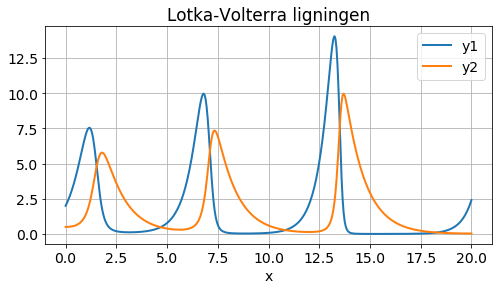

In [5]:
def lotka_volterra(x, y):
    # Lotka-Volterra ligningen
    alpha, beta, delta, gamma = 2, 1, 0.5, 1     # Parameterne
    dy = array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

a, b = 0, 20                # Integrasjonsintervallet
y0 = array([2, 0.5])        # Startverdier

x_lv, y_lv = odl_loser(lotka_volterra, a, b, y0, 0.05)

plot(x_lv,y_lv);
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1','y2'],loc=1);

## Høyere ordens differensialligninger

Hva med høyere ordens differensialligninger, kan de også løses med Eulers metode? 

Gitt ligningen

$$ u^{(m)}(x) = f\big(x, u(x), u'(x), \cdots, u^{(m-1)}\big). $$

For å få entydig løsning av denne, må startverdiene

$$ 
u(a), u'(a), u''(a), \dotsc, u^{(m-1)}(a)  
$$|
være kjent, så det antar vi fra nå av.

Differensialligningen av orden $m$ over kan skrives om til et system av ODL ved følgende triks: 

La 

$$ 
y_1(x) = u(x), \quad y_2(x) = u'(x), \quad 
y_3(x) = u''(x), \quad \dotsm \quad, y_{m}(x) = u^{(m-1)}(x) 
$$

Så følgende gjelder

\begin{align}
  y_1' &= y_2, & y_1(a) &= u(a) \\
  y_2' &= y_3, & y_2(a) &= u'(a) \\
       & \vdots  && \vdots\\
  y_{m-1}' &= y_m, & y_{m-1}(a) &= u^{(m-2)}(a) \\
  y_m' &= f(x, y_1, y_2, \cdots, y_{m-1},y_m), & y_m(a) &= u^{(m-1)}(a)  
\end{align}

og dette er ikke noe annet enn et system av differensialligninger. Og de vet vi hvordan kan løses f.eks. med Eulers metode. 

##### Eksempel 

[Van der Pols ligning](https://en.wikipedia.org/wiki/Van_der_Pol_oscillator)
er en ikke-lineær 2. ordens differensialligning gitt ved

$$ u'' = \mu (1-u^2)u' - u $$

Den kan skrives om til et system av 2 differensialligninger

\begin{align}
y_1' &= y_2  \\
y_2' &= \mu(1-y_1^2)y_2 - y_1
\end{align}

La f.eksempel $\mu=2$, $u(0)=2$ og $u'(0)=0$, og løs ligningen med Eulers metode over intervallet 

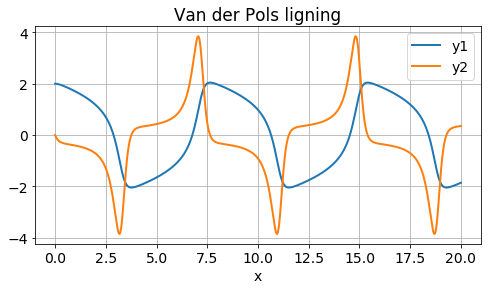

In [6]:
def van_der_pol(x, y):
    # Van der Pols ligning
    mu = 2
    dy = array([y[1],
                mu*(1-y[0]**2)*y[1]-y[0] ])
    return dy
    
x_vdp, y_vdp = odl_loser(van_der_pol, a=0, b=20, y0=array([2,0]), h=0.01)

plot(x_vdp,y_vdp);
xlabel('x')
title('Van der Pols ligning')
legend(['y1','y2'],loc=1);

## Feilanalyse for Eulers metode

For å få et inntrykk av hvordan feilen endres med steglengden $h$, 
la oss måle feilen i endepunktet $|y(b)-y_N|$ for ulike verdier av $h$. 

In [7]:
def f(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h = 0.1
a, b = 0, 1
y0 = 1
print('h           feil\n---------------------')
for n in range(10):
    x_num, y_num = odl_loser(f, a, b, y0, h)
    feil = abs(y_eksakt(b)-y_num[-1])       # Feil i siste punkt!
    print(format('{:.3e}   {:.3e}'.format( h, feil)))
    h = 0.5*h

h           feil
---------------------
1.000e-01   1.383e-02
5.000e-02   6.505e-03
2.500e-02   3.157e-03
1.250e-02   1.555e-03
6.250e-03   7.720e-04
3.125e-03   3.846e-04
1.563e-03   1.920e-04
7.813e-04   9.589e-05
3.906e-04   4.792e-05
1.953e-04   2.396e-05


Denne tabellen viser at feilen halveres når skrittlengden halveres, det betyr at $|y(b) - y_N| \approx C h$ for en eller annen konstant $C$.

Gjelder dette for alle ligninger, og kan vi eventuelt vise at så er tilfelle? I analysen under ser vi bare på en skalar ligning, men resultatet lar seg generalisere til systemer av ligninger. 

### Lokal og global feil, og sammenhengen mellom disse. 

I denne diskusjonen vil snakke om to typer feil: 
* _Lokal avbruddsfeil_ $d_{n+1}$: er den feilen som gjøres i et steg. 
* _Global feil_ $e_n$: Avvik mellom eksakt og numerisk løsning etter $n$ steg, dvs. $e_n = y(x_n)-y_n$.

Så hvordan kan vi uttrykke disse to feilene, og hvordan henger de sammen? 

Eulers metode er ikke noe annet enn de to første leddene i en Taylorutvikling, ergo er den lokale avbruddsfeilen lik restleddet i denne:

$$ 
  d_{n+1} = y(x_n+h) - \big( y(x_n) + h y'(x_n) \big) = \frac{1}{2}h^2 y''(\xi), \qquad \xi \in (x_n, x_n+h).  
$$
  
Videre vil vi se hvordan den globale feilen utvikler seg fra et steg til det neste. Siden $y'(x_n) = f(x_n, y(x_n))$ har vi: 

\begin{align*}
 y(x_n+h) &= y(x_n) + h f(x_n,y(x_n)) + d_{n+1},  & \text{Ligningen over} \\
 y_{n+1} &= y_n + h f(x_n, y_n), & \text{Eulers metode}   
\end{align*}

Differensen mellom disse, definisjonen av global feil $e_n$ og bruk av [middelverdisetningen](wiki.math.ntnu.no/tma4100/tema/differentiation?&#middelverdisetningen_og_teoremet_om_kritiske_punkt) resulterer i

$$
e_{n+1} = e_n + h \big( f(x_n, y(x_n)) - f(x_n, y_n) \big) + d_{n+1}
          = e_n + h f_y(x_n, \eta) e_n + d_{n+1}.  
$$

Her er $f_y = \frac{\partial f}{\partial y}$, og $\eta$ en eller annen verdi mellom $y_n$ og $y(x_n)$. La nå $D$ og $L$ være konstanter slik at

$$ 
|f_y(x,y)| \leq L \qquad \text{og} \qquad |y''(x)| \leq 2D.
$$

for alle verdier av $x,y$. 
Ta absoluttverdien på begge sider, og bruk trekantulikheten for absoluttverdier:

$$
  |e_{n+1}| \leq (1+hL)|e_n| + D h^2. 
$$

Siden $y_0 = y(a)$ er $e_0=0$. Uttrykket over gir oss: 

\begin{align}
|e_1| &\leq Dh^2 \\
|e_2| & \leq (1+hL)|e_1| + Dh^2 \leq \big((1+hL)+1\big) Dh^2 \\
|e_3| &\leq (1+hL)|e_2|+ Dh^2 \leq \big((1+hL)^2 + (1+hL) + 1\big) Dh^2 \\
& \vdots \\
|e_N| & \leq (1+hL)|e_2|+ Dh^2 \leq \sum_{n=0}^{N-1} (1+hL)^n Dh^2 
\end{align}

Nå bruker vi noen kjente resultater, oppgitt i [Vedlegg](#rekker), til å vise at 




$$ 
\sum_{n=0}^{N-1} (1+hL)^n = \frac{(1+hL)^N-1}{(1+hL)-1} 
\leq \frac{(e^{hL})^N-1}{hL} = \frac{e^{hLN}-1}{hL} 
= \frac{e^{L(b-a)}-1}{hL}. 
$$

siden $(b-a)=hN$. Ved å sette dette inn i ulikheten for $|e_N|$ over får vi følgende øvre grense for feilen etter $N$ steg med steglengde $h=(b-a)/N$:

$$ |y(b) - y_N| = |e_N| \leq \frac{e^{L(b-a)}-1}{L} D h =  C h, $$

der $C=\frac{e^{L(b-a)}-1}{L} D$ avhenger av lengden av integrasjonsintervallet $b-a$, av egenskaper ved ligningen og løsningen ($L$ og $D$), men ikke av steglengden $h$. Og øvre grense for feilen vil halveres når steglengden halveres (og vi bruker dobbelt så mange steg for å nå punktet $b$), så resultatet av det numeriske eksperimentet over er i samsvar med teorien.  

Dette argumentet som er vist her kan gjennomføres også for andre metoder, dvs. det kan vises at: 

$$ |d_{n+1}| \leq D h^{p+1} \qquad \Rightarrow \qquad |y(b) - y_N| \leq C h^p $$

for dertil egnede konstanter $C$ og $D$, uavhengig av $h$. Vi sier i så fall at _metoden er av orden $p$_. Eulers metode er dermed en første ordens metode. 

# Heuns metode 

I denne seksjonen skal vi se på hvordan vi kan finne metoder av høyere orden enn 1. Igjen utvikler vi metoden basert på den skalare ligningen, med resultatet er like gyldig for systemer. 

Gitt differensial-ligningen

$$ y' = f(x,y). $$

Anta at vi har funnet en numerisk løsning $x_n, y_n \approx y(x_n)$. Den eksakte løsningen av differensialligningen gjennom punktet $x_n,y_n$ er gitt ved 

$$ y(x_n + h) = y(x_n) + \int_{x_n}^{x_{n}+h} f(x,y(x)) dx $$

Integralet på venstre side kan tilnærmes med f.eks. trapesmetoden

$$ 
y(x_n+h) \approx y(x_n) + \frac{h}{2} 
\big(f(x_n, y_n) + f(x_{n+1},y(x_{n+1})\big) 
$$

Hvis vi nå erstatter $y(x_{n+1})$ med en tilnærmelse $y_{n+1}$ får vi
_trapesmetoden_:

$$
y_{n+1} = y_{n} + \frac{h}{2} \big( f(x_n,y_n) + f(x_{n+1},y_{n+1})\big).
$$

Dette er et eksempel på en _implisitt metode_, for å finne $y_{n+1}$ må vi løse et ikkelineært ligningssystem for hvert steg $n$. For å unngå dette, la oss bruke Eulers metode for å tilnærme $y_{n+1}$ på venstre side av ligningen. Dette resulterer i [Heuns metode](https://wiki.math.ntnu.no/tma4100/tema/differentialequations?&#numeriske_losninger)

\begin{align}
   u_{n+1} &= y_n + h f(x_n, y_n), \\
   y_{n+1} &= y_n + \frac{h}{2} \big(f(x_n,y_n) + f(x_{n+1},u_{n+1}) \big).
\end{align}

Det er vanlig å skrive denne metoden på formen:

\begin{align*}
  k_1 &= f(x_n, y_n), \\
  k_2 &= f(x_n+h, y_n+h k_1), \\
  y_{n+1} &= y_n + \frac{h}{2}(k_1 + k_2).
\end{align*}

Denne er implementert her: 

In [8]:
def heun(f, x, y, h):
    # gjør et skritt med Heuns metode. 
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_neste = y + 0.5*h*(k1+k2)
    x_neste = x + h
    return x_neste, y_neste

### Testing
Nå kan vi jo sammenligne resultatet fra Eulers og Heuns metode på testproblemet

$$ y' = -2xy, \qquad y(0)=1 $$

med eksakt løsning $y(x) = e^{-x^2}$ på intervallet $[0,1]$. 
Bruk $h=0.1$ for Eulers metode, og $h=0.2$ for Heuns metode. Dermed krever begge metodene 10 funksjonsberegninger, og sammenligningen er slik sett rettferdig. 

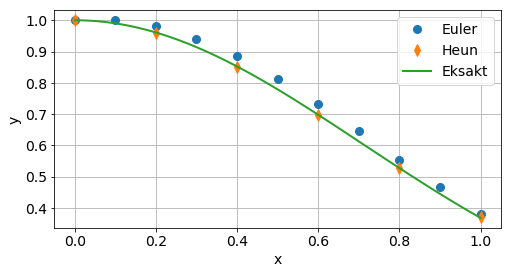

In [9]:
def f(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h = 0.1
a, b = 0, 1
y0 = 1

xn_euler, yn_euler = odl_loser(f, a, b, y0, h, metode=euler)
xn_heun, yn_heun = odl_loser(f, a, b, y0, 2*h, metode=heun)

x = linspace(a, b, 101)
plot(xn_euler, yn_euler, 'o') 
plot(xn_heun, yn_heun, 'd')
plot(x, y_eksakt(x))
legend(['Euler','Heun','Eksakt']);
xlabel('x')
ylabel('y');


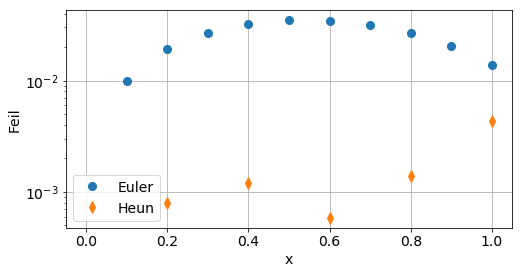

In [10]:
semilogy(xn_euler, abs(y_eksakt(xn_euler)- yn_euler), 'o');
semilogy(xn_heun, abs(y_eksakt(xn_heun)- yn_heun), 'd');
xlabel('x')
ylabel('Feil')
legend(['Euler', 'Heun'],loc=3);


Vi kan også se hvordan feilen i sluttpunktet endrer seg med steglengden. 
Her sammenligner vi resultatet fra Eulers og Heuns metode: 

In [11]:
def f(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h = 0.1
a, b = 0, 1
y0 = 1

print('Feil i Euler og Heuns metode\n')
print('h           Euler       Heun')
print('---------------------------------')
for n in range(10):
    x_euler, y_euler = odl_loser(f, a, b, y0, h, metode=euler)
    x_heun, y_heun = odl_loser(f, a, b, y0, h, metode=heun)
    feil_euler = abs(y_eksakt(b)-y_euler[-1])
    feil_heun = abs(y_eksakt(b)-y_heun[-1])
    print(format('{:.3e}   {:.3e}   {:.3e}'.format( h, feil_euler, feil_heun)))
    h = 0.5*h

Feil i Euler og Heuns metode

h           Euler       Heun
---------------------------------
1.000e-01   1.383e-02   1.174e-03
5.000e-02   6.505e-03   3.011e-04
2.500e-02   3.157e-03   7.601e-05
1.250e-02   1.555e-03   1.909e-05
6.250e-03   7.720e-04   4.781e-06
3.125e-03   3.846e-04   1.196e-06
1.563e-03   1.920e-04   2.992e-07
7.813e-04   9.589e-05   7.483e-08
3.906e-04   4.792e-05   1.871e-08
1.953e-04   2.396e-05   4.678e-09


For Heuns metode reduseres feilen til ca. 1/4 for hver gang steglengden $h$ halveres. Det antyder at feilen $|y(b)-y_N| \approx C h^2$, og dermed at Heuns metode er av orden 2. Dette går det også an å vise teoretisk, men det ligger utenfor pensum i dette kurset. Dessverre. 

La oss også løse Lotka-Volterra-ligningen med de to metoden, og sammenligne resultatet: 

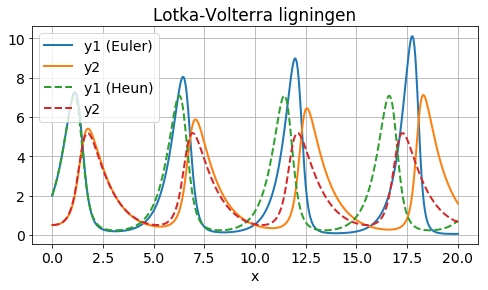

In [12]:
def lotka_volterra(x, y):
    # Lotka-Volterra ligningen
    alpha, beta, delta, gamma = 2, 1, 0.5, 1
    dy = array([alpha*y[0]-beta*y[0]*y[1], 
                delta*y[0]*y[1]-gamma*y[1]])
    return dy

a, b = 0, 20
y0 = array([2, 0.5])
h = 0.02

x_euler, y_euler = odl_loser(lotka_volterra, a, b, y0, h, metode=euler)
x_heun, y_heun = odl_loser(lotka_volterra, a, b, y0, 2*h, metode=heun)

plot(x_euler,y_euler)
plot(x_heun, y_heun, '--')
xlabel('x')
title('Lotka-Volterra ligningen')
legend(['y1 (Euler)','y2', 'y1 (Heun)', 'y2'],loc=2);

Selv om den eksakte løsningen ikke er kjent i dette tilfellet, vet vi at den er periodisk. Heuns metode reflekterer det mye bedre enn Eulers metode.

#### Numeriske eksperimenter
1. Løs Van der Pols ligning med Heuns metode. Eksperimenter med steglengden $h$, og sammenlign med resultatet fra 
2. Implementer den klassiske Runge-Kutta metoden

   \begin{align*}
   k_1 &= f(x_n, y_n)\\
   k_2 &= f\left(x_n+\frac{h}{2}, y_n + \frac{h}{2}k_1\right) \\
   k_3 &= f\left(x_n+\frac{h}{2}, y_n + \frac{h}{2}k_2\right) \\
   k_4 &= f(x_n+h, y_n + hk_3)\\
   y_{n+1} &= y_n + \frac{h}{6}(k_1 + 2k_2 + 2k_3 + k_4). 
   \end{align*}
   
   Verifiser numerisk at metoden er av orden 4. (Hvis steglengden halveres, skal feilen reduseres med en faktor $(1/2)^4$). 

# Feilestimering og steglengdekontroll

Å kontrollere den globale feilen er notorisk vanskelig, og langt utenfor hva som kan diskuteres i dette kurset. Å kontrollere den lokale feilen, og å justere steglengden slik at den lokale feilen (feilen i et steg) holder seg under, men nær opp til en oppgitt toleranse er derimot ikke veldig komplisert. 

### Feilestimering
Gitt at vi har to metoder, en av orden $p$, og en av orden $p+1$ eller høyere. Gitt et punkt $x_n, y_n$. Gå et steg, med steglengde $h_n$ med metoden av orden $p$ til $x_{n+1}, y_{n+1}$. Gjør det samme med metoden av orden $p+1$, noe som resulterer i  $x_{n+1}, \hat{y}_{n+1}$. Vi antar videre at metoden av høyest orden er langt mer nøyaktig enn metoden av lav orden, slik at et _lokalt feilestimat_ $lf_{n+1}$ er gitt ved 

$$ lf_{n+1} = \| \hat{y}_{n+1} - y_{n+1} \| $$

der feilen måles i en passende [norm](#norm). Dette er altså en tilnærmelse til feilen i $y_{n+1}$, resultatet fra metoden av lavest orden. 

##### Eksempel: Euler og Heun
Gjør et steg med  henhodsvis Eulers og Heuns metode  på ligningen
$$ y' = -2xy, \qquad y(0)=1,
$$
La $h=0.1$, og bruk de to løsningene til å finne feilestimatet, og sammenlign med den virkelige feilen: 

Et skritt med Eulers metode gir: 
$$ y_1 = 1 - 0.1\cdot 2\cdot 0 \cdot 1 = 1 $$
og med Heuns metode 

\begin{align*}
 u &= 1 - 0.1 \cdot 2\cdot 0 \cdot 1, \\
 \hat{y}_1 &= 1 + \frac{0.1}{2}(-2\cdot 0 \cdot 1 - 2 \cdot 0.1 \cdot 1) 
 = 0.99 
\end{align*}

Feilestimatet blir
$$ lf_{1} = |\hat{y}_1 - y_1| = 1 \cdot 10^{-2}. $$

Feilen i første steg med Eulers metode er $|e^{-0.1^2}-y_1|= 0.995\cdot 10^{-2}$, så i dette tilfellet er feilestimatet en god tilnærmelse til feilen.

### Steglengdekontroll
Nå som vi har et estimat for feilen i hvert steg ønsker vi å kunne kontrollere steglengden slik at 

$$ lf_{n+1} \lesssim \text{Tol} $$

der $\text{Tol}$ er en toleranse gitt av brukeren.  
Så gitt at vi har gjort et steg fra $x_{n},y_n$ med steglengde $h_{n+1}$ og har funnet det lokale feilestimatet $lf_{n+1}$:

* Hvis $lf_{n+1} > \text{Tol}$
    * Gjør steget på nytt, med mindre steglengde $h_{n}$.
* Hvis $lf_{n+1} < \text{Tol}$
    * Godta løsningen $x_{n+1}, y_{n+1}$. 
    * Øk eventuelt steglengden for neste steg. 

I begge tilfellene vil vi justere steglengden, men hvordan? 

Til det trenger vi en antagelse til, at 

$$ lf_{n+1} \approx D h_{n}^{p+1}. $$

der $D$ er en konstant. Det er mulig å vise at dette er en rimelig antagelse over et kort intervall, forutsatt at steglengden $h_{n}$ er tilstrekkelig liten. Vi ønsker en ny steglengde $h_{ny}$ slik at 

$$ Tol \approx D h_{ny}^{p+1}. $$

Ved å kombinere disse to tilnærmelsene får vi: 

$$ 
\frac{\text{Tol}}{lf_{n+1}} \approx \left(\frac{h_{ny}}{h_n}\right)^{p+1}
\qquad \Rightarrow \qquad 
h_{ny} \approx \left( \frac{\text{Tol}}{lf_{n+1}} \right)^{\frac{1}{p+1}} h_{n}.
$$

For å unngå for mange forkastede steg er det fornuftig å være litt konservative i valg av steglengde, dvs. vi bruker 

$$
h_{ny} = P\cdot \left( \frac{\text{Tol}}{lf_{n+1}} \right)^{\frac{1}{p+1}} h_{n}
$$

der _pessimistfaktoren_ $P<1$ er en valgt konstant, normalt mellom 0.5 og 0.95. Skrittlengdekontrollen er den samme enten steget aksepteres eller forkastes. 

## Implementasjon
Da har vi egentlig alle bitene som trengs for å lage en adaptiv ODL-løser basert på Eulers og Heuns metode. Men det er fortsatt noen rent praktiske aspekter det skal tas hensyn til:  

1. Kombinasjonen av Eulers og Heuns metode kan skrives som
 
   \begin{align*}
      k_1 &= f(x_n, y_n), \\
      k_2 &= f(x_n+h, y_n+h k_1), \\
      y_{n+1} &= y_n + h k_1, && \text{Euler} \\
      \hat{y}_{n+1} &= y_n + \frac{h}{2}(k_1 + k_2), && \text{Heun} \\
      lf_{n+1} &= \|\hat{y}_{n+1} - y_{n+1}\| = \frac{h}{2}\|k_2-k_1 \|.
    \end{align*}
    
    Denne er implementert i funksjonen `heun_euler`. 
   
2. Selv om feilestimatet gjelder for Eulers metode, så bruker vi løsningen fra Heuns metode (_lokal ekstrapolasjon_). Vi bruker derfor ikke $y_{n+1}$ fra Eulers metode direkte. 

3. For å stoppe akkurat i punktet $b$, må siste siste steglengde justeres.

4. Legg inn en sikkerhetsmekanisme for å unngå uendelige løkker. I dette tilfellet har vi brukt maksimalt antall forsøk (vellykket eller mislykket), som samsvarer med kall av funksjonen `heun_euler`. 

5. Hovedfunksjonen `odl_adaptive` er skrevet slik at det skal være lett å teste andre par av metoder enn dette. Det er også grunnen til at `heun_euler` returnerer ordenen til den laveste ordens metode, $p$. 



In [13]:
def heun_euler(f, x, y, h):
    # Et steg med Heuns og Eulers metode. 
    # Inn: f, verdier for x og y, og steglengden h
    # Ut : løsningen x og y i neste steg, basert på Heuns metode 
    #      et lokalt feilestimat. 
    #      p: orden av Eulers metode (lavest orden)
    
    k1 = f(x, y)
    k2 = f(x+h, y+h*k1)
    y_neste = y + 0.5*h*(k1+k2)      # Heuns metode (lokal ekstrapolasjon)
    x_neste = x + h
    feil_estimat = 0.5*h*norm(k2-k1)
    p = 1
    return x_neste, y_neste, feil_estimat, p



def odl_adaptiv(f, a, b, y0, h0, tol = 1.e-6, metode=heun_euler):
    # Løser for ordinære differensialligninger
    #    y' = f(x,y), y(a)=y0
    # med en adaptive metode (varierende steglengde)
    # Inn: f, a, b, og startverdien y0
    #      startsteglengde h, og en toleranse tol. 
    #      metode: funksjon som gjør et steg med en gitt metode
    # Ut: Array med x- og y- verdier. 
    
    y_num = array([y0])   # Array for løsningen y 
    x_num = array([a])    # Array for x-verdiene 

    xn = a                # Løpende verdier av x, y og steglengde
    yn = y0 
    h = h0
    Max_metodekall = 10000        # Maksimalt antall kall av metode 
    n_metodekall = 0
    
    # Hovedløkke:
    while xn < b - 1.e-10:               # Buffer for avrundingsfeil 
        # Juster steglengden for siste steg.
        if xn + h > b:                   
            h = b - xn 
        
        # Gjør et steg med valgt metode
        x_forsok, y_forsok, feil_estimat, p = metode(f, xn, yn, h)
        n_metodekall = n_metodekall + 1
        
        if feil_estimat <= tol:   
            # Løsningen godkjennes, xn og yn oppdateres 
            xn = x_forsok      
            yn = y_forsok
            # Utvider arrayene for y_sol og x_sol med oppdatert løsning 
            y_num = concatenate((y_num, array([yn])))
            x_num = append(x_num, xn)
        
        # else: steget forkastes, ingen oppdatering av xn og yn. 
        
        # Juster  steglengden (0.8 er pessimistfaktoren)
        h = 0.8*(tol/feil_estimat)**(1/(p+1))*h
        
        # Stopp hvis maks antall kall av metoden er gjort
        if n_metodekall > Max_metodekall:
            print('Maks antall metodekall nådd')
            return x_sol, y_sol
    print('Antall godkjente steg =  ', len(x_num)-1)
    print('Antall forkastede steg = ', n_metodekall - len(x_num)+1)
    return x_num, y_num

## Testing
Velg igjen testligningen

$$ y' = -2xy, \qquad y(0)=1 $$

med eksakt løsning $y(x) = e^{-x^2}$ på intervallet $[0,1]$. 

Antall godkjente steg =   27
Antall forkastede steg =  2


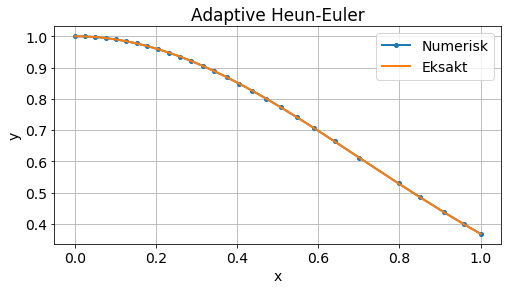

In [14]:
def f(x, y):
    return -2*x*y

def y_eksakt(x):
    return exp(-x**2)

h0 = 100
a, b = 0, 1
y0 = 1

x_num, y_num = odl_adaptiv(f, a, b, y0, h0, tol=1.e-3)

plot(x_num, y_num, '.-', x_num, y_eksakt(x_num))
title('Adaptive Heun-Euler')
xlabel('x')
ylabel('y')
legend(['Numerisk', 'Eksakt']);


Vi kan også studere feilen $|y(x_n)-y_n|$. 

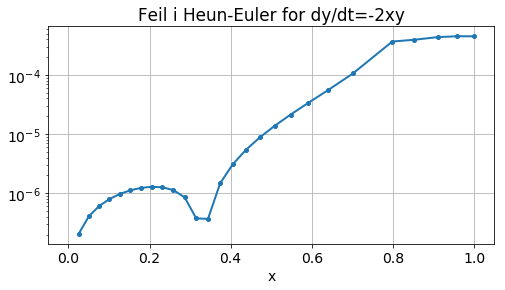

In [15]:
feil = abs(y_eksakt(x_num) - y_num)
semilogy(x_num, feil, '.-')
title('Feil i Heun-Euler for dy/dt=-2xy')
xlabel('x');

Og vi kan se hvordan steglengden varierer underveis

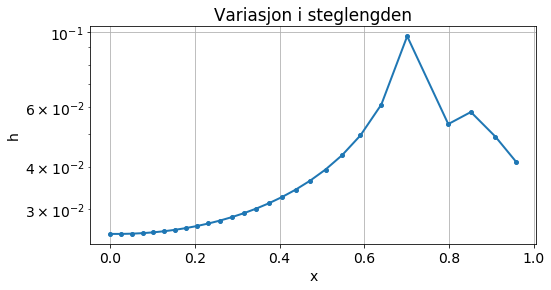

In [16]:
h_n = diff(x_num)            # vektor med x_num[n+1]-x_num[n], n=0..N-1
x_n = x_num[0:-1]            # vektor med x_num[n], n=0..N-1
semilogy(x_n, h_n, '.-')
xlabel('x')
ylabel('h')
title('Variasjon i steglengden');

#### Numeriske eksperimenter
1. Løs Lotka-Volterra ligningen med `odl_adaptive`, med f.eks. $h_0=0.1$ og $\text{tol}=10^{-3}$. Se hvordan steglengden varierer. 
2. Gjenta med Van der Pols ligning. 

## Runge--Kutta metoder

Både Heuns metode og Eulers metode er eksempler på _Runge-Kutta_ metoder. 

Kombinasjonen av Heun og Euler, som ikke bare gir en numerisk løsning men også et feilestimat kalles _Runge-Kutta par_ (på engelsk _embedded Runge-Kutta pair_). 

Det fins selvsagt en hel del slike se f.eks. [denne oversikten](https://en.wikipedia.org/wiki/List_of_Runge–Kutta_methods).

Vi har brukt kombinasjonen av Heun og Euler til å forklarer ideen med adaptive metoder. I praksis vel en vanligvis bruke metoder av høyere orden, det gir mer nøyaktighet for færre funksjonskall og dermed mer effektive metoder. 

<a name="rekker"></a>
# Vedlegg

1. Geometriske rekker: 
   $$ \sum_{k=0}^{m-1}x^k = \frac{x^m-1}{x-1} $$
2. Rekkeutviklingen av eksponensialfunksjonen: 
   $$ e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!}. $$
   Derav følger:
   $$ 1 + x \leq e^x, \qquad x > 0. $$
3. $$(e^x)^y = e^{xy}. $$

<a name="norm"></a>
##### Normer: 
La $\mathbf{x}=[x_1,\cdots,x_2]\in \mathbb{R}^n$.  To vanlige uttrykk for lengden (eller normen) av $\mathbf{x}$ er 

$$
 \|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2}, \qquad \|\mathbf{x}\|_{\infty} = \max_i|x_i|. 
$$